In [1]:
import numpy as np
import networkx as nx
import scipy
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt
import pprint
import random
from gymnasium import Env
from gymnasium.spaces import Graph,Discrete,Box
import gymnasium as gym

## This section creates an environment from the graph created by the Graph Creator
This environment is somewhat similar to frozenlake,but without the holes, it gets is 20 reward points when it reaches the destination and -2 for any other step taken that does not give an output
> As the action space takes value (0,1,2) and there might be less than 3 commitable actions so, sometimes when an action that cannot taken, no reward is given and the no of steps is not added

In [2]:
class GraphEnv(Env):
    def __init__(self):
        
        # max 3 possible actions, go to another node (for now)
        self.action_space = Discrete(3)
        
        # this is the graph
        self.g_env = nx.read_graphml('g1.gml')
        self.g_no_node = len(self.g_env.nodes())
        self.node_list = list(self.g_env.nodes())
        
         # observation space
        self.observation_space = Discrete(self.g_no_node-1)
        
        
        # A dictionary that relates each discrete value in the observation
        # space to a node obtained from the graph
        
            # 1. Create empty dictionary
        self.node_dict = {}
        self.node_inv_dict = {}
        
            # 2. relating the key to the value of the node
        for key,value in enumerate(self.node_list):
            self.node_dict[key] = value 
            
            # 3. relating the value to the key ( used later on )
        self.node_inv_dict = {value: key for key, value in self.node_dict.items()}
        
            # 4. to determine the reward obtained in the given step
            
        
        # starting state of the graph
        self.state = self.node_dict[6]
        
#         print(self.node_dict)
        
        # sets the maximum steps after which the program will terminate 
        self.max_steps = 100
        self.step_now = 0
        self.current_step = 0
        
        # extra dont know why when self.state exists 
        self.current_state = self.node_dict[6]
        
        
        # this is extra things for visualization you do not need to know
        graph = self.g_env
        
        position = list(graph.nodes())
#         pprint.pprint(position)
        
        position = [self.str_to_tuple(name) for name in position]
#         pprint.pprint(position)
        pos = dict(zip(graph.nodes(), position))
#         pprint.pprint(pos)
        
        self.node_positions = pos

    def step(self,action_1):
        state = self.state
        possible = [i for i in self.g_env.neighbors(state)]
        if action_1<len(possible):
            state = possible[action_1]
            self.step_now = self.step_now + 1
            if state == self.node_dict[2]:
                reward = 20
            else:
                reward = -2 
        else:
            reward = 0
        if ((self.step_now < self.max_steps) and (state != self.node_dict[2])):
            terminal = False
        else:
            terminal = True
#             print("terminating episode")
        self.state = state
        return self.state,reward,terminal,{}
    
    
    def render(self):
        pass
    def reset(self):
        self.state = self.node_dict[6]
        self.step_now = 0
        return self.state
    
    
    # extra funcitons for testing and visualization
    
    def show_step(self):
        return (self.step_now)
    
    def temp_render(self,episode):
        nx.draw(self.g_env, self.node_positions,node_size=80)
#         print(self.state)
        x,y = self.node_positions[str(self.state)]
#         print(x,y)
        filename = f"images/plot_{episode}_{self.step_now}.png"
        plt.scatter(x, y, s=150, c='red')
        plt.savefig(filename)
        plt.show()
    
    def str_to_tuple(self,string):
        return tuple(float(x) for x in string.strip('()').split(','))
    
    def show_no_of_nodes(self):
        value = self.g_no_node
        return value

    

### First Steps for Implementing Algorithm

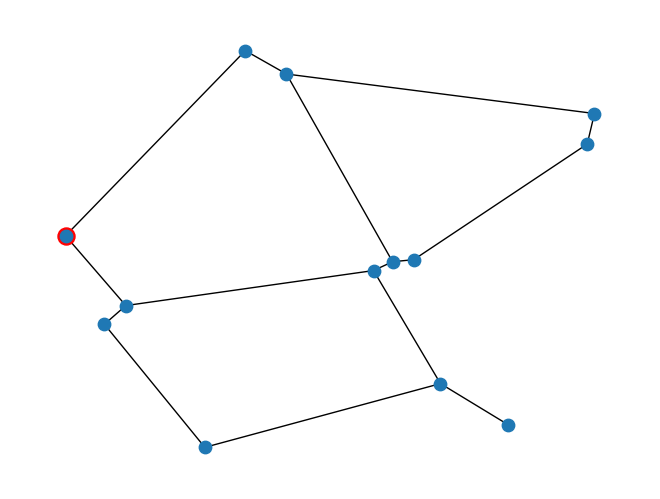

In [6]:
# Creates a environment into the env variable
# so that env now acts as the 
env = GraphEnv()

# Renders the environment state that we created
# the 1000 here is the episode number passed so that the output can be tracked according to the environment
env.temp_render(1000)

In [5]:
# Runs 2 episodes of set of random actions in the environment until the terminating state is reached
episodes = 2

for episode in range(1,episodes+1):
    state = env.reset()
    done = False
    score = 0
    while not done:
#         env.temp_render(episode)
        action = env.action_space.sample()
        n_state,reward,done,info = env.step(action)
        print(env.observation_space)
        if (done == True):
            print('terminating episode = {}'.format(env.show_step()))
        score += reward
    print('Episode: {} Score: {} \n'.format(episode,score))

Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
terminating episode = 10
Episode: 1 Score: 2 

Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Discrete(12)
Disc